<a href="https://colab.research.google.com/github/LAMECH9/LAMECH9/blob/main/Lamech_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Importing pandas for data manipulation
import numpy as np # Importing numpy for numerical operations
import plotly.express as px # Importing plotly Express for interactive visualizations
import plotly.graph_objects as go # Importing plotly graph objects for advanced visualization
import bokeh.plotting as bp # Importing Bokeh for Web Based interactive visualization
import altair as alt # Importing Altair for declarative data visualization
import seaborn as sns # Importing seaborn fpr statistical data visualization
import matplotlib.pyplot as plt # Importing Matplotlib for standard plotting
from scipy import stats # Importing Scipy for statistical analysis
from statsmodels.tsa.arima.model import ARIMA # Importing ARIMA model for time sries forecastin
import geopandas as gpd # Importing Geopandas for handling spatial data
import folium # Importing Folium for interactive map visualization

In [ ]:
# Step 1 Load Dataset (CSV file will be created separately)
df = pd.read_csv('/content/housing.csv') # Reading dataset into a pandas DataFrame
print("Original Data:")
print(df.head()) # Display the first 5 rows of the dataset
print(df.info())

Original Data:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA..

In [ ]:
# 1.3.2 Handling Missing Data
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
# 1.3.3 Calculating Summary Statistics
print(df.describe()) # Generating summary statistics such as mean, std, min, max, etc

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

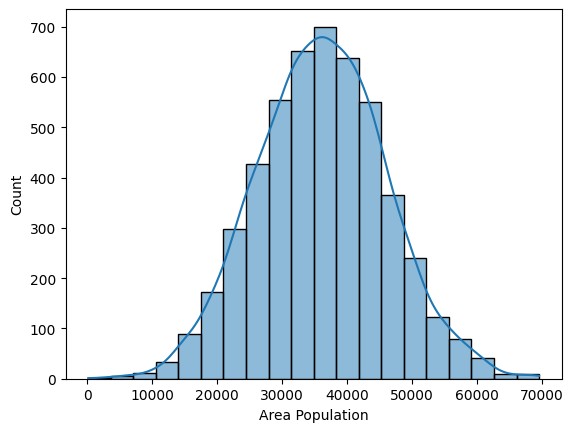

In [ ]:
# 1.3.4.1 Data visualization basics
sns.histplot(df['Area Population'], bins=20, kde=True) # Creating a histogram with kernel density estimate
plt.show() # Displayimg plot

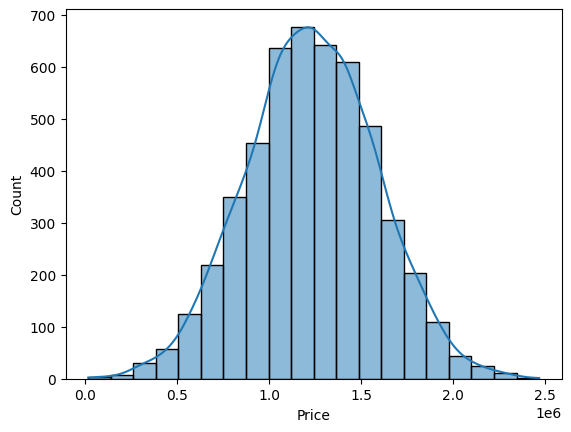

In [ ]:
# 1.3.4 Data visualization basics
sns.histplot(df['Price'], bins=20, kde=True) # Creating a histogram with kernel density estimate
plt.show() # Displayimg plot

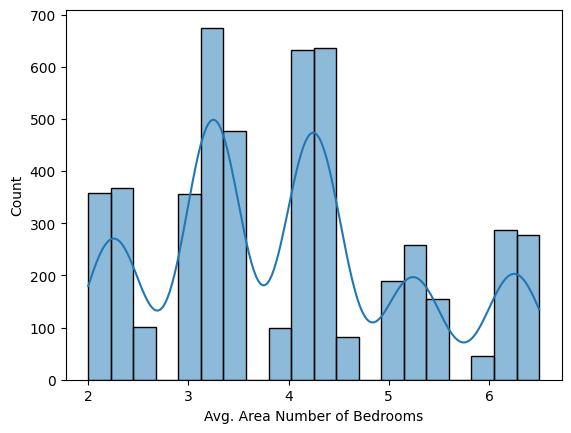

In [ ]:
# 1.3.4.1 Data visualization basics
sns.histplot(df['Avg. Area Number of Bedrooms'], bins=20, kde=True) # Creating a histogram with kernel density estimate
plt.show() # Displayimg plot

In [ ]:
# 2. Advanced Data Visualization
# 2.1.2 Creating Interactive charts with plotly
fig = px.scatter(df, x='Avg. Area Number of Bedrooms', y='Area Population', color='Avg. Area House Age', title='Avg. Number of Bedrooms vs Area Population') # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

In [ ]:
# 2. Advanced Data Visualization
# 2.1.2 Creating Interactive charts with plotly
fig = px.scatter(df, x='Price', y='Area Population', color='Avg. Area House Age', title='Price vs Area Population') # Creating an interactive
fig.show() # Displaying the scatter plot

In [ ]:
fig = px.bar(df, x='Price', y='Area Population', color='Avg. Area House Age', title='Price vs Area Population') # Creating an interactive bar chart
fig.show() # Display the bar chart

In [ ]:
fig = px.line(df.groupby('Price')['Area Population'].mean().reset_index(), x='Price', y='Area Population', title='Price per Area Population') # Creating an interactive line chart
fig.show() # Display the line chart

In [ ]:
# 3. Statistical Methods for EDA
# 3.1 Key Statistics
print("Mean:", df['Price'].mean()) # Calculating and printing the mean of 'Price'
print("Variance:", df['Price'].var()) # Calculating and printing the variance of 'Price'
print("Correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr()) # Filtering only numeric columns

Mean: 1232072.6541453
Variance: 124692058204.1025
Correlation Matrix:
                               Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                 

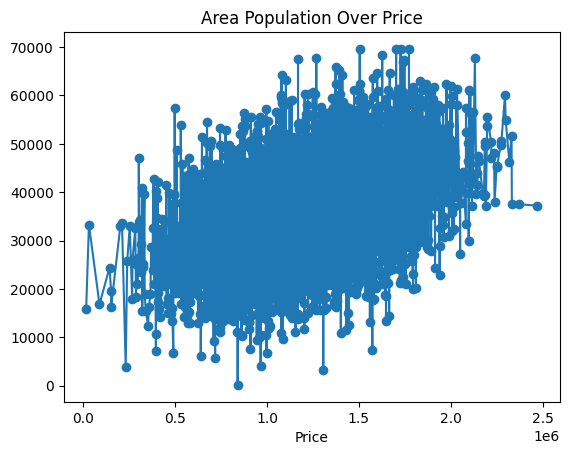

In [ ]:
# 4. Time Series and Special Data Analysis
# 4.1 Time Series Analysis
ts_data = df.groupby('Price')['Area Population'].sum()  #Aggregation total bill amounts per day
ts_data.plot(title='Area Population Over Price', marker='o') # Plotting total bill amount over different days
plt.show() # Displaying the time series plot